<a href="https://colab.research.google.com/github/blackpanther590/ProjectsAIML/blob/main/HandWrittenDigitPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Written Digit Prediction(By Nishant)**

Objective: To predictive the number written with hand.

Data Source: sklearn datasets

Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Import Data

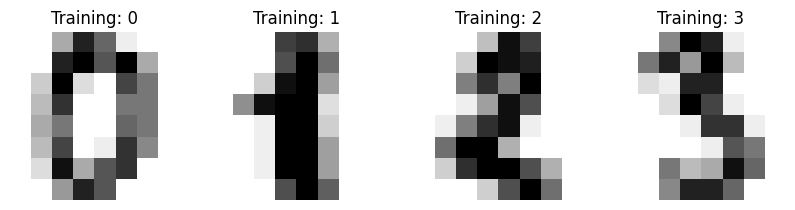

In [ ]:
from sklearn.datasets import load_digits
df= load_digits()

_, axes =plt.subplots(nrows=1, ncols=4,figsize=(10,3))
for ax,image,label in zip(axes, df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training: %i" %label)

Data Preprocessing

In [ ]:
df.images.shape

(1797, 8, 8)

In [ ]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [ ]:
df.images[0].shape


(8, 8)

In [ ]:
len(df.images)

1797

In [ ]:
n_sample=len(df.images)
data=df.images.reshape((n_sample,-1))

In [ ]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
data[0].shape

(64,)

In [ ]:
data.shape

(1797, 64)

Scaling Image data

In [ ]:
data.min()

0.0

In [ ]:
data.max()

16.0

In [ ]:
data=data/16
data.min()

0.0

In [ ]:
data.max()

1.0

In [ ]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,df.target,train_size=0.7)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

Predict Test Data

In [ ]:
y_pred=rf.predict(x_test)
y_pred

array([4, 4, 7, 0, 9, 1, 8, 4, 1, 9, 5, 8, 4, 0, 0, 6, 6, 0, 5, 2, 0, 0,
       7, 6, 9, 4, 3, 7, 4, 4, 2, 6, 7, 7, 2, 1, 0, 5, 0, 6, 7, 5, 1, 6,
       5, 8, 4, 3, 5, 6, 6, 4, 8, 1, 3, 6, 7, 6, 4, 1, 8, 5, 2, 2, 3, 4,
       7, 2, 3, 0, 8, 6, 4, 7, 2, 0, 8, 7, 7, 9, 4, 4, 6, 2, 2, 8, 9, 7,
       4, 9, 6, 2, 7, 0, 3, 4, 9, 5, 2, 3, 2, 0, 6, 9, 0, 6, 2, 1, 5, 5,
       6, 0, 7, 9, 7, 3, 3, 7, 7, 1, 2, 0, 6, 7, 6, 9, 7, 1, 1, 0, 4, 1,
       5, 5, 1, 0, 8, 6, 2, 6, 2, 2, 7, 7, 9, 8, 9, 8, 6, 6, 8, 2, 5, 1,
       2, 0, 6, 4, 2, 3, 8, 3, 0, 3, 5, 6, 7, 4, 6, 0, 4, 9, 6, 0, 7, 0,
       4, 1, 5, 5, 9, 7, 8, 7, 6, 8, 6, 0, 3, 1, 1, 9, 8, 6, 9, 9, 2, 6,
       3, 9, 3, 9, 3, 8, 1, 6, 6, 0, 4, 4, 2, 5, 8, 6, 8, 8, 3, 0, 1, 2,
       4, 5, 3, 4, 2, 6, 7, 9, 1, 3, 5, 1, 6, 0, 7, 8, 8, 5, 6, 6, 4, 8,
       8, 5, 0, 0, 4, 2, 6, 3, 3, 4, 2, 7, 0, 1, 3, 0, 5, 2, 7, 4, 8, 5,
       2, 7, 5, 5, 1, 1, 9, 4, 9, 7, 3, 0, 9, 8, 9, 4, 1, 9, 4, 8, 0, 3,
       6, 8, 0, 5, 6, 9, 5, 0, 1, 0, 2, 3, 9, 1, 3,

Model Accuracy

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 54,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 49,  0,  0,  0,  1,  1,  1],
       [ 0,  0,  0,  0, 53,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 63,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  1],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 46,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  2, 52]])

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        52
           2       0.98      1.00      0.99        54
           3       1.00      0.94      0.97        52
           4       1.00      0.98      0.99        54
           5       1.00      1.00      1.00        51
           6       1.00      0.98      0.99        64
           7       0.95      0.98      0.96        56
           8       0.92      0.98      0.95        47
           9       0.96      0.95      0.95        55

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

